# TensorFlow 101

### 1. Basic syntax
### 2. TensorFlow Graphs
### 3. tf.Variable
### 4. tf.Placeholder
### 5. TensorFlow Neural Network
### 6. TensorFlow Regression and Classification
### 7. Estimator API
### 8. Save and Restore Model

## 5. TensorFlow Neural Network

### Simple Regression

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
np.random.seed(99)
tf.set_random_seed(99)

In [2]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [3]:
x_data

array([ 0.51683568,  1.07534631,  3.19870774,  1.9276725 ,  5.36859433,
        5.75240781,  6.05953416,  6.41786494, 10.36077109,  8.5204772 ])

In [4]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

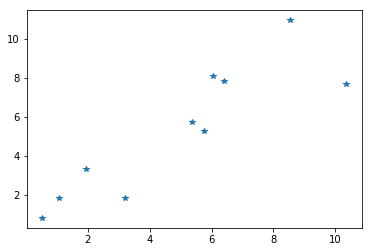

In [6]:
plt.plot(x_data,y_label,'*')

In [7]:
np.random.rand(2)

array([0.21168679, 0.55434578])

In [8]:
m = tf.Variable(0.21)
b = tf.Variable(0.55)

### Cost Function

In [9]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


### Optimizer

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [15]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [17]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [18]:
final_slope

0.96210253

In [19]:
final_intercept

0.51679826

### Evaluate Results

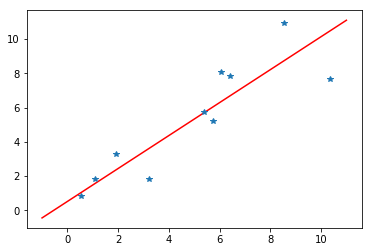

In [20]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

## 6. TensorFlow Regression and Classification

## Regression

In [21]:
x_data = np.linspace(0.0,10.0,1000000)

In [22]:
noise = np.random.randn(len(x_data))

In [23]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [26]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [27]:
my_data.head()

,X Data,Y
0,0.00000,5.882817
1,0.00001,4.419923
2,0.00002,4.498445
3,0.00003,5.590968
4,0.00004,4.268404


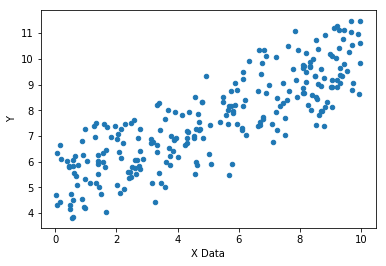

In [28]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [30]:
batch_size = 8

In [31]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [32]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [33]:
y_model = m*xph + b

In [34]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [35]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [36]:
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [38]:
model_m

0.53122765

In [39]:
model_b

4.9749284

### Results

In [40]:
y_hat = x_data * model_m + model_b

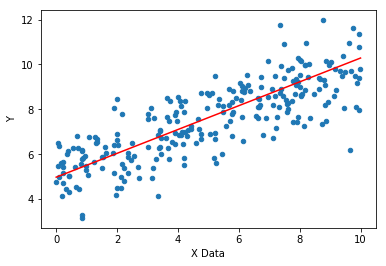

In [41]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## 7. tf.estimator API


1. “Train-to-Serve” Design
2. Hides Session, Graph, Layers, Iterative Loops (Train, Eval, Predict) 
3. Hooks for All Phases of Model Training and Evaluation
    * Load Input: input_fn()
    * Train: model_fn() and train()
    * Evaluate: eval_fn() and evaluate()
    * Performance Metrics: Loss, Accuracy, ...
    * Save and Export: export_savedmodel()
    * Predict: predict()

In [44]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [45]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp62zlo7pd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x127efb358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [49]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [50]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [51]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [52]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp62zlo7pd/model.ckpt.
INFO:tensorflow:loss = 165.07944, step = 1
INFO:tensorflow:global_step/sec: 654.365
INFO:tensorflow:loss = 22.548088, step = 101 (0.155 sec)
INFO:tensorflow:global_step/sec: 1325.5
INFO:tensorflow:loss = 7.976448, step = 201 (0.074 sec)
INFO:tensorflow:global_step/sec: 1414.33
INFO:tensorflow:loss = 2.4224353, step = 301 (0.071 sec)
INFO:tensorflow:global_step/sec: 1336.74
INFO:tensorflow:loss = 11.318235, step = 401 (0.074 sec)
INFO:tensorflow:global_step/sec: 1087.82
INFO:tensorflow:loss = 10.451458, step = 501 (0.092 sec)
INFO:tensorflow:global_step/sec: 1060.53
INFO:tensorflow:loss = 0.44342053, step = 601 (0.094 sec)
INFO:tensorflo

### Evaluation

In [54]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-10-22:12:21
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp62zlo7pd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-10-22:12:22
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1140628, global_step = 1000, loss = 4.456251


In [55]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-10-22:12:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp62zlo7pd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-06-10-22:12:28
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1076458, global_step = 1000, loss = 4.430583


In [56]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1140628, 'loss': 4.456251, 'global_step': 1000}
eval metrics: {'average_loss': 1.1076458, 'loss': 4.430583, 'global_step': 1000}


### Predictions

In [58]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [59]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp62zlo7pd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3268065], dtype=float32)},
 {'predictions': array([4.968932], dtype=float32)},
 {'predictions': array([5.6110573], dtype=float32)},
 {'predictions': array([6.2531824], dtype=float32)},
 {'predictions': array([6.895308], dtype=float32)},
 {'predictions': array([7.537433], dtype=float32)},
 {'predictions': array([8.179559], dtype=float32)},
 {'predictions': array([8.821684], dtype=float32)},
 {'predictions': array([9.46381], dtype=float32)},
 {'predictions': array([10.105934], dtype=float32)}]

In [60]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp62zlo7pd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [61]:
predictions

[array([4.3268065], dtype=float32),
 array([4.968932], dtype=float32),
 array([5.6110573], dtype=float32),
 array([6.2531824], dtype=float32),
 array([6.895308], dtype=float32),
 array([7.537433], dtype=float32),
 array([8.179559], dtype=float32),
 array([8.821684], dtype=float32),
 array([9.46381], dtype=float32),
 array([10.105934], dtype=float32)]

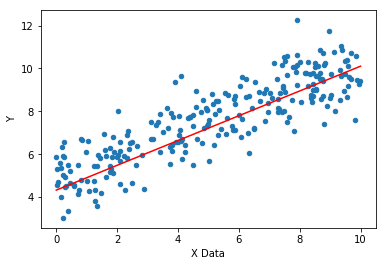

In [62]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')